In [1]:
import gzip
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import Counter
from pathlib import Path
from scipy.stats import entropy

# Ignore SettingWithCopyWarning
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
# Load the data
def load_to_dataframe(file_path):
    with gzip.open(file_path, "rt", encoding="utf-8") as f:
        data = [json.loads(line) for line in f]
    df = pd.DataFrame(data)
    return df

In [3]:
# BIPs:
file_path = (Path.cwd() / '..' / 'data' / 'ImprovementProposals' / 'BIPs_pullRequests.jsonl.gz').resolve()
df_BIPs = load_to_dataframe(file_path)
df_BIPs

,number,title,state,url,createdAt,mergedAt,author,labels,comments,reviews
0,1,Update BIP-0001 for github move,MERGED,https://github.com/bitcoin/bips/pull/1,2013-12-06T14:31:14Z,2013-12-13T07:44:04Z,{'login': 'laanwj'},{'edges': []},"{'edges': [{'node': {'author': None}}, {'node'...",{'edges': [{'node': {'author': {'login': 'glit...
1,2,Adding link to Ruby implementation of BIP0032,MERGED,https://github.com/bitcoin/bips/pull/2,2013-12-13T07:39:31Z,2013-12-13T07:43:52Z,{'login': 'wink'},{'edges': []},{'edges': []},{'edges': []}
2,3,update to latest BIP-0039 draft,MERGED,https://github.com/bitcoin/bips/pull/3,2013-12-15T16:25:57Z,2013-12-16T08:35:10Z,{'login': 'prusnak'},{'edges': []},{'edges': []},{'edges': []}
3,4,Extend description of the partial merkle block...,MERGED,https://github.com/bitcoin/bips/pull/4,2013-12-27T16:13:06Z,2014-01-23T07:04:09Z,{'login': 'sipa'},{'edges': []},{'edges': [{'node': {'author': {'login': 'sipa...,{'edges': []}
4,5,Update bip-0037.mediawiki,CLOSED,https://github.com/bitcoin/bips/pull/5,2013-12-28T19:18:12Z,None,{'login': 'benjiqq'},{'edges': []},{'edges': [{'node': {'author': {'login': 'gmax...,{'edges': []}
...,...,...,...,...,...,...,...,...,...,...
1392,1553,Create pythonapp.yml,CLOSED,https://github.com/bitcoin/bips/pull/1553,2024-02-18T20:23:09Z,None,{'login': 'Roojsz88'},{'edges': []},{'edges': []},{'edges': []}
1393,1554,Update Bitcoin dev mailing list to Google Groups,OPEN,https://github.com/bitcoin/bips/pull/1554,2024-02-23T23:05:28Z,None,{'login': 'luke-jr'},{'edges': []},{'edges': [{'node': {'author': {'login': 'kanz...,{'edges': [{'node': {'author': {'login': 'Marc...
1394,1555,Update BIP 21 with information about more mode...,OPEN,https://github.com/bitcoin/bips/pull/1555,2024-03-01T17:10:35Z,None,{'login': 'TheBlueMatt'},{'edges': []},{'edges': [{'node': {'author': {'login': 'josi...,{'edges': []}
1395,1556,bip-tombriar-compressed-transactions,OPEN,https://github.com/bitcoin/bips/pull/1556,2024-03-05T17:53:47Z,None,{'login': 'TomBriar'},{'edges': []},{'edges': []},{'edges': []}


In [4]:
# EIPs:
file_path = (Path.cwd() / '..' / 'data' / 'ImprovementProposals' / 'EIPs_pullRequests.jsonl.gz').resolve()
df_EIPs = load_to_dataframe(file_path)
df_EIPs

,number,title,state,url,createdAt,mergedAt,author,labels,comments,reviews
0,3,"Spelling, Grammar, Initial Structure",MERGED,https://github.com/ethereum/EIPs/pull/3,2015-10-27T07:44:32Z,2015-10-27T07:44:47Z,{'login': 'wanderer'},{'edges': []},{'edges': []},{'edges': []}
1,4,Add a Gitter chat badge to README.md,CLOSED,https://github.com/ethereum/EIPs/pull/4,2015-10-27T07:56:52Z,None,{'login': 'gitter-badger'},{'edges': []},{'edges': []},{'edges': []}
2,6,updated history; simple spelling fixes,MERGED,https://github.com/ethereum/EIPs/pull/6,2015-10-28T05:07:11Z,2015-10-28T05:07:29Z,{'login': 'wanderer'},{'edges': []},{'edges': []},{'edges': []}
3,7,remove reference to 'the reference client',MERGED,https://github.com/ethereum/EIPs/pull/7,2015-10-29T06:33:08Z,2015-10-29T06:33:15Z,{'login': 'wanderer'},{'edges': []},{'edges': []},{'edges': []}
4,9,define PoC and PoS,MERGED,https://github.com/ethereum/EIPs/pull/9,2015-11-17T05:34:45Z,2015-11-17T13:34:59Z,{'login': 'ethers'},{'edges': []},{'edges': []},{'edges': []}
...,...,...,...,...,...,...,...,...,...,...
6204,8324,Update EIP-7547: Change modification to payloa...,MERGED,https://github.com/ethereum/EIPs/pull/8324,2024-03-15T17:23:30Z,2024-03-16T05:15:52Z,{'login': 'mcdee'},"{'edges': [{'node': {'name': 'c-update'}}, {'n...",{'edges': [{'node': {'author': {'login': 'eth-...,{'edges': [{'node': {'author': {'login': 'tere...
6205,8329,Update EIP-3074: allow authorized to send value,OPEN,https://github.com/ethereum/EIPs/pull/8329,2024-03-18T20:25:29Z,None,{'login': 'lightclient'},"{'edges': [{'node': {'name': 'c-update'}}, {'n...",{'edges': [{'node': {'author': {'login': 'eth-...,{'edges': []}
6206,8330,Bump nokogiri from 1.14.3 to 1.16.3,OPEN,https://github.com/ethereum/EIPs/pull/8330,2024-03-19T00:16:35Z,None,{'login': 'dependabot'},"{'edges': [{'node': {'name': 'dependencies'}},...",{'edges': []},{'edges': []}
6207,8331,Update EIP-1015: Fix typo,OPEN,https://github.com/ethereum/EIPs/pull/8331,2024-03-19T00:54:30Z,None,{'login': 'xiaoxianBoy'},"{'edges': [{'node': {'name': 'c-update'}}, {'n...",{'edges': [{'node': {'author': {'login': 'eth-...,{'edges': []}


In [5]:
# HIPs:
file_path = (Path.cwd() / '..' / 'data' / 'ImprovementProposals' / 'HIPs_pullRequests.jsonl.gz').resolve()
df_HIPs = load_to_dataframe(file_path)
df_HIPs

,number,title,state,url,createdAt,mergedAt,author,labels,comments,reviews
0,4,suggested HIP README changes,MERGED,https://github.com/hashgraph/hedera-improvemen...,2019-07-24T04:14:24Z,2019-07-24T19:35:50Z,{'login': 'Cooper-Kunz'},{'edges': []},{'edges': [{'node': {'author': {'login': 'Coop...,{'edges': [{'node': {'author': {'login': 'stev...
1,6,update links to new repository URL,MERGED,https://github.com/hashgraph/hedera-improvemen...,2019-07-24T20:13:40Z,2019-07-24T20:15:00Z,{'login': 'Cooper-Kunz'},{'edges': []},{'edges': []},{'edges': [{'node': {'author': {'login': 'stev...
2,7,Update logos in repo,MERGED,https://github.com/hashgraph/hedera-improvemen...,2019-07-24T20:59:53Z,2019-07-24T21:07:23Z,{'login': 'Cooper-Kunz'},{'edges': []},{'edges': []},{'edges': [{'node': {'author': {'login': 'stev...
3,9,HIP Template,MERGED,https://github.com/hashgraph/hedera-improvemen...,2019-10-18T23:35:38Z,2019-11-14T23:46:46Z,{'login': 'Cooper-Kunz'},{'edges': []},{'edges': [{'node': {'author': {'login': 'calv...,{'edges': [{'node': {'author': {'login': 'kent...
4,12,Add Apache 2.0 license,CLOSED,https://github.com/hashgraph/hedera-improvemen...,2019-11-05T22:34:59Z,None,{'login': 'steven-sheehy'},{'edges': []},{'edges': [{'node': {'author': {'login': 'Coop...,{'edges': [{'node': {'author': {'login': 'Coop...
...,...,...,...,...,...,...,...,...,...,...
669,916,Update hip-868.md to Accepted,MERGED,https://github.com/hashgraph/hedera-improvemen...,2024-03-08T17:17:49Z,2024-03-13T11:59:11Z,{'login': 'mgarbs'},{'edges': []},{'edges': [{'node': {'author': {'login': 'netl...,{'edges': [{'node': {'author': {'login': 'Nana...
670,917,Update hip-874.md to Last Call,MERGED,https://github.com/hashgraph/hedera-improvemen...,2024-03-13T14:58:14Z,2024-03-13T18:09:03Z,{'login': 'mgarbs'},{'edges': []},{'edges': [{'node': {'author': {'login': 'netl...,{'edges': [{'node': {'author': {'login': 'serg...
671,918,Create hip-0000-nft-music-metadata.md,CLOSED,https://github.com/hashgraph/hedera-improvemen...,2024-03-15T16:49:21Z,None,{'login': 'itsbrandondev'},{'edges': []},{'edges': [{'node': {'author': {'login': 'netl...,{'edges': []}
672,919,Create hip-0000-nft-music-metadata.md,CLOSED,https://github.com/hashgraph/hedera-improvemen...,2024-03-15T17:03:10Z,None,{'login': 'itsbrandondev'},{'edges': []},{'edges': [{'node': {'author': {'login': 'netl...,{'edges': []}


In [6]:
# CIPs:
file_path = (Path.cwd() / '..' / 'data' / 'ImprovementProposals' / 'CIPs_pullRequests.jsonl.gz').resolve()
df_CIPs = load_to_dataframe(file_path)
df_CIPs

,number,title,state,url,createdAt,mergedAt,author,labels,comments,reviews
0,1,Update CIP1.md,CLOSED,https://github.com/cardano-foundation/CIPs/pull/1,2020-05-05T11:21:21Z,None,{'login': 'nathankaiser'},{'edges': []},{'edges': []},{'edges': []}
1,2,CIP2 - Coin Selection Algorithms,MERGED,https://github.com/cardano-foundation/CIPs/pull/2,2020-05-06T04:02:32Z,2020-08-04T09:20:11Z,{'login': 'jonathanknowles'},{'edges': []},{'edges': []},{'edges': [{'node': {'author': {'login': 'jona...
2,3,CIP3 - Wallet key generation,MERGED,https://github.com/cardano-foundation/CIPs/pull/3,2020-05-09T20:57:05Z,2020-11-20T16:10:07Z,{'login': 'SebastienGllmt'},{'edges': []},{'edges': [{'node': {'author': {'login': 'Seba...,{'edges': [{'node': {'author': {'login': 'Seba...
3,4,CIP4 - Wallet checksum,MERGED,https://github.com/cardano-foundation/CIPs/pull/4,2020-05-09T21:16:59Z,2020-10-27T20:32:11Z,{'login': 'SebastienGllmt'},{'edges': []},{'edges': []},{'edges': [{'node': {'author': {'login': 'Seba...
4,5,CIP 1: Status Draft->Proposed,MERGED,https://github.com/cardano-foundation/CIPs/pull/5,2020-05-20T10:45:37Z,2020-05-20T10:59:03Z,{'login': 'crptmppt'},{'edges': []},{'edges': []},{'edges': [{'node': {'author': {'login': 'Seba...
...,...,...,...,...,...,...,...,...,...,...
638,782,CIP-0100 | Add test vector file,OPEN,https://github.com/cardano-foundation/CIPs/pul...,2024-03-13T18:16:48Z,None,{'login': 'Ryun1'},{'edges': [{'node': {'name': 'Update'}}]},{'edges': [{'node': {'author': {'login': 'Quan...,{'edges': []}
639,784,CIP-0069 | add Datum to ScriptContext,OPEN,https://github.com/cardano-foundation/CIPs/pul...,2024-03-14T19:43:13Z,None,{'login': 'zliu41'},"{'edges': [{'node': {'name': 'Update'}}, {'nod...",{'edges': [{'node': {'author': {'login': 'rpha...,{'edges': [{'node': {'author': {'login': 'Micr...
640,785,CIP-???? | Coin Selection - Optimized Random I...,OPEN,https://github.com/cardano-foundation/CIPs/pul...,2024-03-15T20:01:50Z,None,{'login': 'NicholasMaselli'},{'edges': [{'node': {'name': 'Category: Wallet...,{'edges': [{'node': {'author': {'login': 'rpha...,{'edges': [{'node': {'author': {'login': 'rpha...
641,786,CIP-0010 | add metadata key 620: seedtrace.org,MERGED,https://github.com/cardano-foundation/CIPs/pul...,2024-03-18T09:23:59Z,2024-03-18T13:27:03Z,{'login': 'rmcilraith'},{'edges': [{'node': {'name': 'CIP-0010: new re...,{'edges': []},{'edges': [{'node': {'author': {'login': 'Ryun...


In [7]:
# XLS:
file_path = (Path.cwd() / '..' / 'data' / 'ImprovementProposals' / 'XLS_pullRequests.jsonl.gz').resolve()
df_XLS = load_to_dataframe(file_path)
df_XLS

,number,title,state,url,createdAt,mergedAt,author,labels,comments,reviews
0,1,update readme with numbering and draft system,MERGED,https://github.com/XRPLF/XRPL-Standards/pull/1,2019-02-24T20:34:10Z,2019-03-04T11:04:50Z,{'login': 'RichardAH'},{'edges': []},{'edges': []},{'edges': [{'node': {'author': {'login': 'Wiet...
1,13,XLS-11d: Retiring Amendments,MERGED,https://github.com/XRPLF/XRPL-Standards/pull/13,2020-05-07T21:39:56Z,2020-05-07T21:41:19Z,{'login': 'mDuo13'},{'edges': []},{'edges': []},{'edges': []}
2,33,Remove XLS-1d,MERGED,https://github.com/XRPLF/XRPL-Standards/pull/33,2021-02-26T22:45:43Z,2021-02-28T16:53:11Z,{'login': 'Wietse-Livingroom'},{'edges': []},{'edges': []},{'edges': []}
3,85,Nft type will contain the version and have a v...,CLOSED,https://github.com/XRPLF/XRPL-Standards/pull/85,2022-10-26T12:11:13Z,None,{'login': 'barryrknapp'},{'edges': []},{'edges': []},{'edges': []}
4,87,XLS to rippled amendment guideline proposal,CLOSED,https://github.com/XRPLF/XRPL-Standards/pull/87,2023-01-20T11:23:56Z,None,{'login': 'Silkjaer'},{'edges': []},{'edges': [{'node': {'author': {'login': 'Silk...,{'edges': [{'node': {'author': {'login': 'inte...
5,95,Add XLS-20 spec:,MERGED,https://github.com/XRPLF/XRPL-Standards/pull/95,2023-03-10T19:16:33Z,2023-03-21T19:20:09Z,{'login': 'shawnxie999'},{'edges': []},{'edges': [{'node': {'author': {'login': 'shaw...,{'edges': [{'node': {'author': {'login': 'Denn...
6,96,Describe process for contributing a new standard:,MERGED,https://github.com/XRPLF/XRPL-Standards/pull/96,2023-03-14T06:33:37Z,2023-04-19T06:39:59Z,{'login': 'intelliot'},{'edges': []},{'edges': [{'node': {'author': {'login': 'Silk...,{'edges': [{'node': {'author': {'login': 'sapp...
7,98,Update XLS-20 (Non-Fungible Token Support) spe...,MERGED,https://github.com/XRPLF/XRPL-Standards/pull/98,2023-03-27T20:32:47Z,2023-07-17T16:41:14Z,{'login': 'shawnxie999'},{'edges': []},{'edges': [{'node': {'author': {'login': 'Silk...,{'edges': [{'node': {'author': {'login': 'ledh...
8,104,XLS-39d: Clawback specification,MERGED,https://github.com/XRPLF/XRPL-Standards/pull/104,2023-04-19T19:47:40Z,2023-05-25T06:21:16Z,{'login': 'shawnxie999'},{'edges': []},{'edges': [{'node': {'author': {'login': 'Silk...,{'edges': [{'node': {'author': {'login': 'sapp...
9,108,XLS-42 draft,CLOSED,https://github.com/XRPLF/XRPL-Standards/pull/108,2023-05-15T18:12:53Z,None,{'login': 'ledhed2222'},{'edges': []},{'edges': []},{'edges': []}


In [8]:
# Proccess the data
def process_data(df):
    # Define the function to extract unique logins
    def filter_logins(edges):
        # Check for None to avoid TypeError
        if edges is None:
            return []
        return list({edge['node']['author']['login'] for edge in edges if edge['node']['author'] is not None})

    # Process the author column
    df.loc[:, 'author'] = df['author'].apply(lambda x: x['login'] if x is not None else None)

    # Process the commenters column
    df.loc[:, 'commenters'] = df['comments'].apply(lambda x: filter_logins(x['edges'] if x is not None else []))

    # Process the reviewers column
    df.loc[:, 'reviewers'] = df['reviews'].apply(lambda x: filter_logins(x['edges'] if x is not None else []))

    # Drop columns that are no longer needed to clean up the DataFrame
    columns_to_drop = ['number', 'mergedAt', 'comments', 'url', 'reviews', 'labels', 'reviewers']
    df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)

    return df

In [9]:
# Processing
df_BIPs = process_data(df_BIPs)
df_EIPs = process_data(df_EIPs)
df_HIPs = process_data(df_HIPs)
df_CIPs = process_data(df_CIPs)
df_XLS = process_data(df_XLS)
df_BIPs

,title,state,createdAt,author,commenters
0,Update BIP-0001 for github move,MERGED,2013-12-06T14:31:14Z,laanwj,[gmaxwell]
1,Adding link to Ruby implementation of BIP0032,MERGED,2013-12-13T07:39:31Z,wink,[]
2,update to latest BIP-0039 draft,MERGED,2013-12-15T16:25:57Z,prusnak,[]
3,Extend description of the partial merkle block...,MERGED,2013-12-27T16:13:06Z,sipa,"[TheBlueMatt, sipa, mikehearn, jgarzik]"
4,Update bip-0037.mediawiki,CLOSED,2013-12-28T19:18:12Z,benjiqq,"[gmaxwell, sipa, josephNLD, benjiqq]"
...,...,...,...,...,...
1392,Create pythonapp.yml,CLOSED,2024-02-18T20:23:09Z,Roojsz88,[]
1393,Update Bitcoin dev mailing list to Google Groups,OPEN,2024-02-23T23:05:28Z,luke-jr,"[achow101, kanzure]"
1394,Update BIP 21 with information about more mode...,OPEN,2024-03-01T17:10:35Z,TheBlueMatt,"[TheBlueMatt, josibake]"
1395,bip-tombriar-compressed-transactions,OPEN,2024-03-05T17:53:47Z,TomBriar,[]


In [10]:
# Function to calculate Gini coefficient
def gini(array):

    array = array.astype(float)  # Ensure array is float for operations
    array = array.flatten()  # all values are treated equally, arrays must be 1d
    if np.amin(array) < 0:
        array -= np.amin(array)  # values cannot be negative
    array += 0.0000001  # values cannot be 0
    array = np.sort(array)  # values must be sorted
    index = np.arange(1, array.shape[0] + 1)  # index per array element
    n = array.shape[0]  # number of array elements
    return ((np.sum((2 * index - n - 1) * array)) / (n * np.sum(array)))  # Gini coefficient


In [11]:
# Calculate Gini series
def calculate_gini_over_time(df):
    df['createdAt'] = pd.to_datetime(df['createdAt'])
    df.sort_values('createdAt', inplace=True)

    dates = []
    gini_coefficients = []

    for date in df['createdAt'].unique():
        current_df = df[df['createdAt'] <= date]
        author_counts = current_df.groupby('author').size()
        gini_coefficient = gini(author_counts.values)
        dates.append(date)
        gini_coefficients.append(gini_coefficient)

    return pd.Series(gini_coefficients, index=dates)

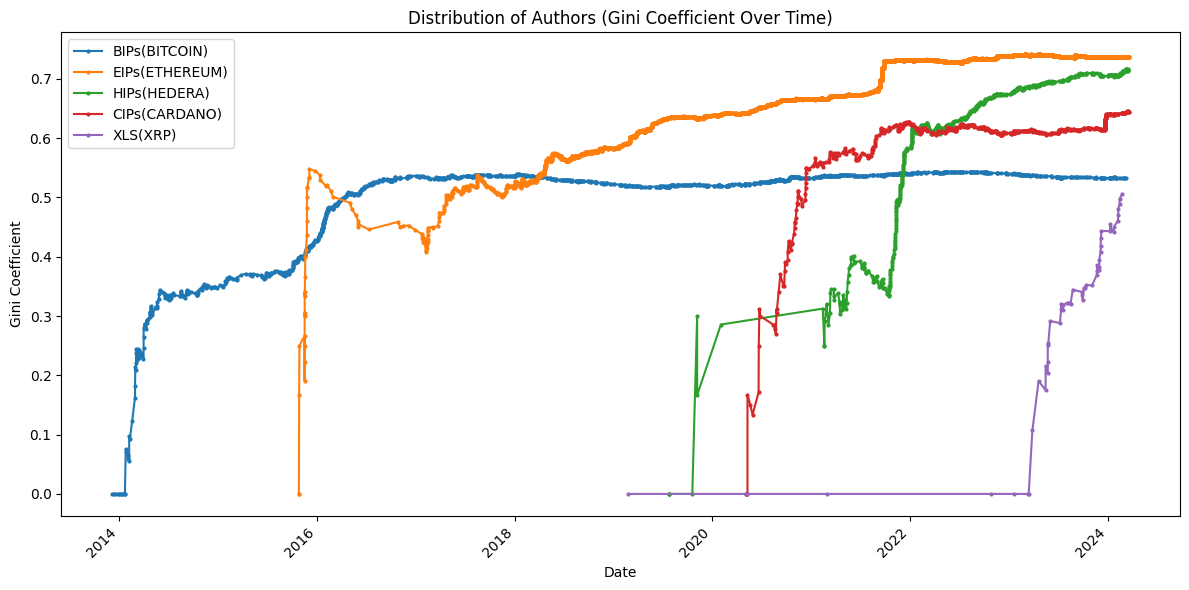

In [12]:
# Plot Gini over time
BIPs_gini_series = calculate_gini_over_time(df_BIPs)
EIPs_gini_series = calculate_gini_over_time(df_EIPs)
HIPs_gini_series = calculate_gini_over_time(df_HIPs)
CIPs_gini_series = calculate_gini_over_time(df_CIPs)
XLS_gini_series = calculate_gini_over_time(df_XLS)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(BIPs_gini_series.index, BIPs_gini_series.values, label='BIPs(BITCOIN)', marker='o', linestyle='-', markersize=2)
plt.plot(EIPs_gini_series.index, EIPs_gini_series.values, label='EIPs(ETHEREUM)', marker='o', linestyle='-', markersize=2)
plt.plot(HIPs_gini_series.index, HIPs_gini_series.values, label='HIPs(HEDERA)', marker='o', linestyle='-', markersize=2)
plt.plot(CIPs_gini_series.index, CIPs_gini_series.values, label='CIPs(CARDANO)', marker='o', linestyle='-', markersize=2)
plt.plot(XLS_gini_series.index, XLS_gini_series.values, label='XLS(XRP)', marker='o', linestyle='-', markersize=2)
plt.title('Distribution of Authors (Gini Coefficient Over Time)')
plt.xlabel('Date')
plt.ylabel('Gini Coefficient')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [13]:
#Shannon Entropy function
def calculate_shannon_entropy(commenters):
    # Count the occurrences of each commenter
    commenter_counts = Counter(commenters)
    # Calculate the probabilities for each commenter
    probabilities = np.array(list(commenter_counts.values())) / sum(commenter_counts.values())
    # Calculate the Shannon Entropy
    return entropy(probabilities, base=2)

In [14]:
# Calculate entropy series
def calc_entropy(df):
    df['createdAt'] = pd.to_datetime(df['createdAt'])
    df.sort_values('createdAt', inplace=True)

    dates = []
    entropies = []
    all_commenters = []  # Use a list to accumulate commenters

    for date, group in df.groupby('createdAt'):
        # Extend the list of all commenters up to the current date
        commenters_today = [commenter for sublist in group['commenters'] for commenter in sublist]
        all_commenters.extend(commenters_today)

        entropy_today = calculate_shannon_entropy(all_commenters)
        dates.append(date)
        entropies.append(entropy_today)

    # Save the entropy values along with their dates for later use
    return pd.Series(entropies, index=pd.to_datetime(dates))

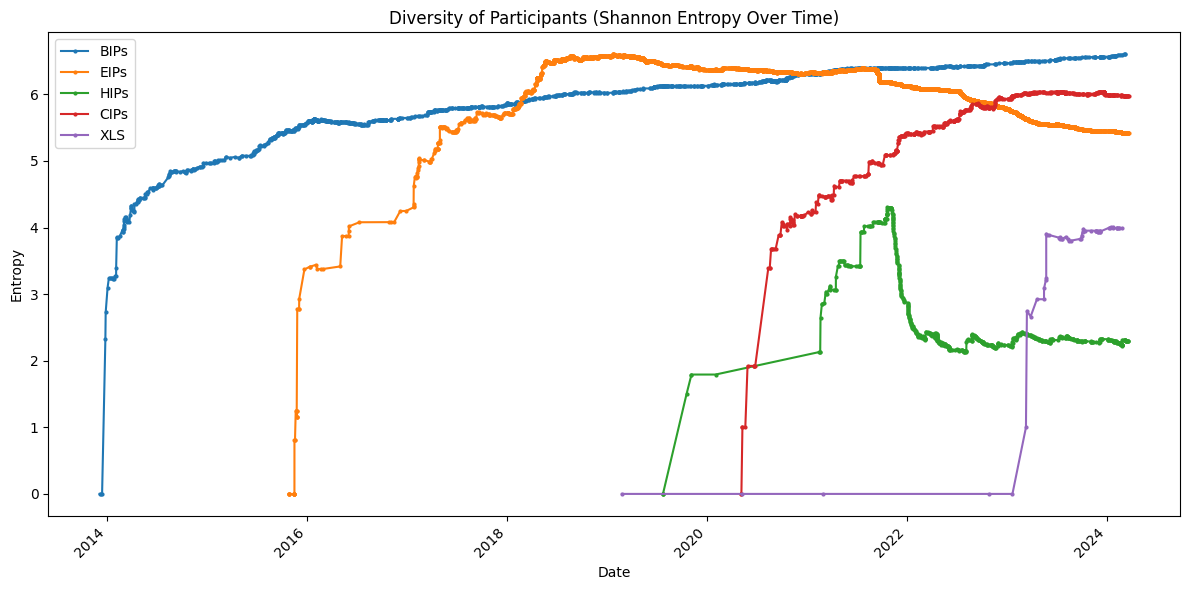

In [15]:
# Plot
BIPs_entropy_series = calc_entropy(df_BIPs)
EIPs_entropy_series = calc_entropy(df_EIPs)
HIPs_entropy_series = calc_entropy(df_HIPs)
CIPs_entropy_series = calc_entropy(df_CIPs)
XLS_entropy_series = calc_entropy(df_XLS)


# Plotting
plt.figure(figsize=(12, 6))
plt.plot(BIPs_entropy_series.index, BIPs_entropy_series.values, label='BIPs', marker='o', linestyle='-', markersize=2)
plt.plot(EIPs_entropy_series.index, EIPs_entropy_series.values, label='EIPs', marker='o', linestyle='-', markersize=2)
plt.plot(HIPs_entropy_series.index, HIPs_entropy_series.values, label='HIPs', marker='o', linestyle='-', markersize=2)
plt.plot(CIPs_entropy_series.index, CIPs_entropy_series.values, label='CIPs', marker='o', linestyle='-', markersize=2)
plt.plot(XLS_entropy_series.index, XLS_entropy_series.values, label='XLS', marker='o', linestyle='-', markersize=2)
plt.title('Diversity of Participants (Shannon Entropy Over Time)')
plt.xlabel('Date')
plt.ylabel('Entropy')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [16]:
# Calculate HHI series
def calculate_hhi_over_time(df, min_threshold=10):
    df['createdAt'] = pd.to_datetime(df['createdAt'])
    df.sort_values('createdAt', inplace=True)

    unique_dates = df['createdAt'].dt.date.unique()
    hhi_values = []
    dates = []

    for date in unique_dates:
        # Filter for successful proposals up to the current date
        filtered_df = df[(df['createdAt'].dt.date <= date) & (df['state'] == 'MERGED')]

        if filtered_df.shape[0] >= min_threshold:
            # Calculate the number of successful proposals per author
            success_per_author = filtered_df['author'].value_counts()

            # Calculate each author's market share
            market_shares = success_per_author / success_per_author.sum()

            # Calculate the HHI
            hhi = (market_shares ** 2).sum()

            hhi_values.append(hhi)
            dates.append(pd.to_datetime(date))

    return pd.Series(hhi_values, index=dates)

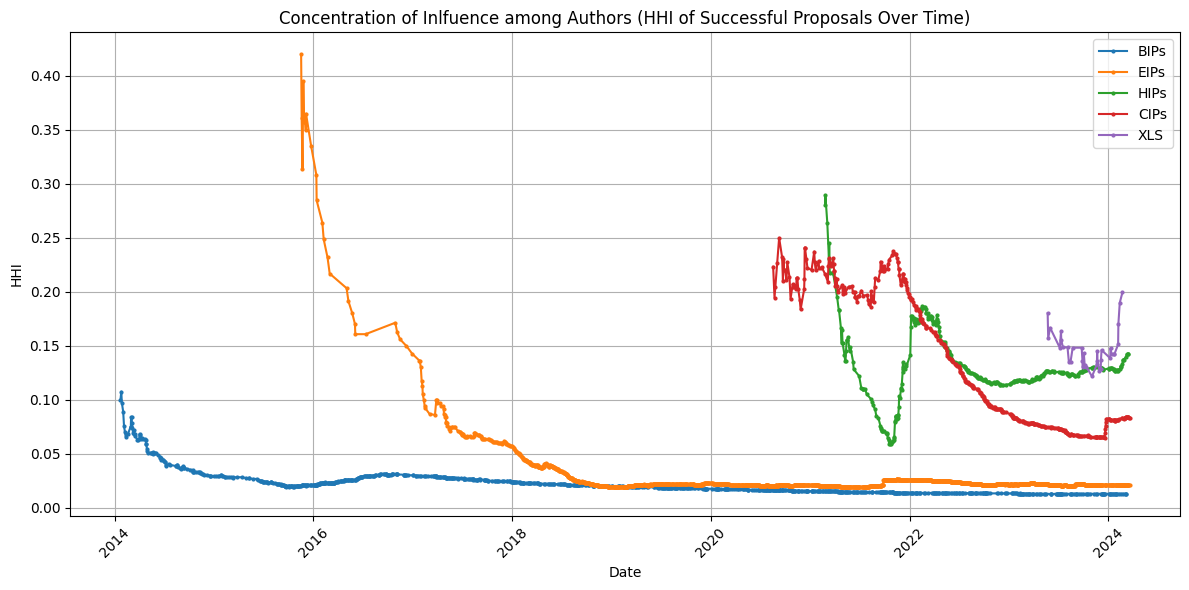

In [17]:
# Plots
BIPs_hhi_series = calculate_hhi_over_time(df_BIPs, min_threshold=10)
EIPs_hhi_series = calculate_hhi_over_time(df_EIPs, min_threshold=10)
HIPs_hhi_series = calculate_hhi_over_time(df_HIPs, min_threshold=10)
CIPs_hhi_series = calculate_hhi_over_time(df_CIPs, min_threshold=10)
XLS_hhi_series = calculate_hhi_over_time(df_XLS, min_threshold=10)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(BIPs_hhi_series.index, BIPs_hhi_series.values, label='BIPs', marker='o', linestyle='-', markersize=2)
plt.plot(EIPs_hhi_series.index, EIPs_hhi_series.values, label='EIPs', marker='o', linestyle='-', markersize=2)
plt.plot(HIPs_hhi_series.index, HIPs_hhi_series.values, label='HIPs', marker='o', linestyle='-', markersize=2)
plt.plot(CIPs_hhi_series.index, CIPs_hhi_series.values, label='CIPs', marker='o', linestyle='-', markersize=2)
plt.plot(XLS_hhi_series.index, XLS_hhi_series.values, label='XLS', marker='o', linestyle='-', markersize=2)
plt.title('Concentration of Inlfuence among Authors (HHI of Successful Proposals Over Time)')
plt.xlabel('Date')
plt.ylabel('HHI')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()